In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Dataset/1_Zomato Dataset/zomato.csv", encoding = 'latin-1')

In [7]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Do these in Data Analysis
1) check for missing values
2) Explore on continuous and categorical features
3) finding relationship between features

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
missingFeatures = [features for features in df.columns if df[features].isnull().sum() > 0]
missingFeatures

['Cuisines']

<AxesSubplot:>

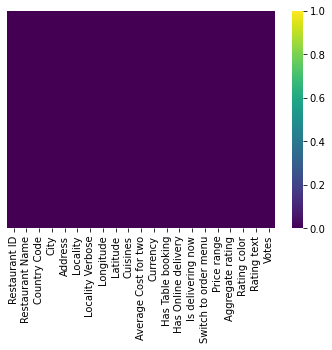

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cmap = 'viridis')

In [24]:
dfCountry = pd.read_excel("Dataset/1_Zomato Dataset/Country-Code.xlsx")
dfCountry

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [32]:
finalDf = pd.merge(df, dfCountry, on = "Country Code", how = "left")
finalDf.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [39]:
countryNames = finalDf['Country'].value_counts().index
countryNames

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [50]:
countryCount = finalDf['Country'].value_counts().values
countryCount

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x29f4509ef08>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

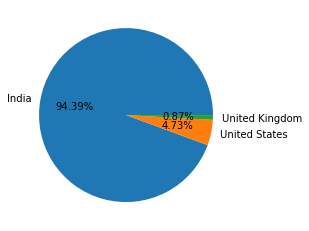

In [48]:
plt.pie(countryCount[:3], labels = countryNames[:3], autopct='%1.2f%%')

# Group By

In [64]:
ratings = finalDf.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0:"Rating Count"})
ratings.head(4)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

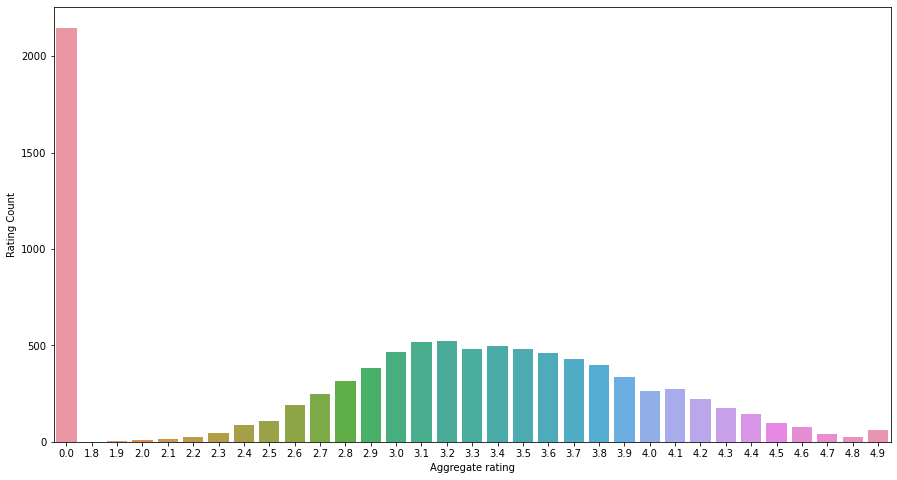

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', data = ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

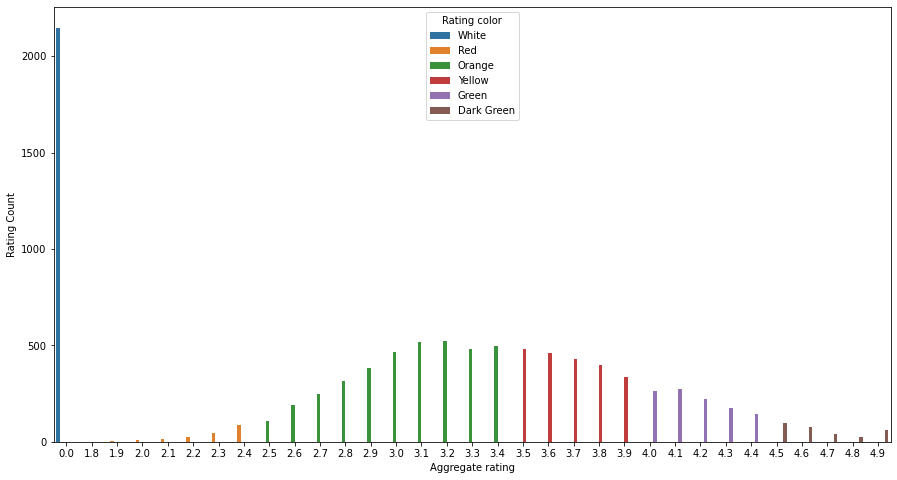

In [78]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color', data = ratings)

<AxesSubplot:xlabel='Rating color', ylabel='count'>

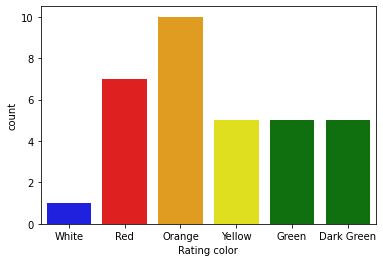

In [79]:
sns.countplot(x = 'Rating color', data = ratings, palette = ['blue', 'red', 'orange', 'yellow', 'green', 'green'])

# Find countries with zero ratings
It is done in two methods

In [123]:
zero_ratings = finalDf.groupby(['Aggregate rating', 'Country']).size().reset_index().rename(columns = {0 : "Count"})
zero_ratings = zero_ratings.where(zero_ratings['Aggregate rating'] == 0)
zero_ratings.dropna(inplace = True)

zero_ratings

,Aggregate rating,Country,Count
0,0.0,Brazil,5.0
1,0.0,India,2139.0
2,0.0,United Kingdom,1.0
3,0.0,United States,3.0


<AxesSubplot:xlabel='Country', ylabel='Count'>

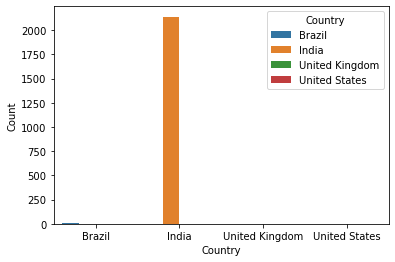

In [128]:
sns.barplot(x = "Country", y = "Count", data = zero_ratings, hue = 'Country')

In [134]:
indexes = finalDf[finalDf["Aggregate rating"] == 0]["Country"].value_counts().index
value = finalDf[finalDf["Aggregate rating"] == 0]["Country"].value_counts().values

<AxesSubplot:>

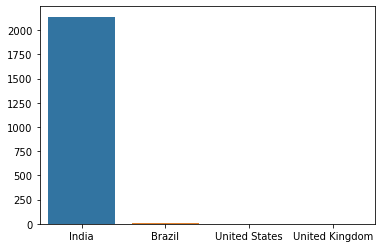

In [136]:
sns.barplot(x = indexes, y = value)

# Find which currency is used by which country


In [155]:
currency = finalDf.groupby(['Country', 'Currency']).size().reset_index().rename(columns = {0 : "Count"})
currency.drop(['Count'], axis = 1, inplace = True)
currency

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


## Which countries have online delivery
This is solved in two methods

In [156]:
finalDf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [164]:
finalDf[finalDf['Has Online delivery'] == "Yes"]["Country"].value_counts().index

Index(['India', 'UAE'], dtype='object')

In [170]:
onlineD = finalDf.groupby(['Country', 'Has Online delivery']).size().reset_index()
onlineD = onlineD.where(onlineD['Has Online delivery'] == "Yes")
onlineD.dropna(inplace = True)
onlineD

,Country,Has Online delivery,0
4,India,Yes,2423.0
14,UAE,Yes,28.0


## Find top 5 cities that have the highest transactions

In [173]:
city_names = finalDf['City'].value_counts().index
city_values = finalDf['City'].value_counts().values

([<matplotlib.patches.Wedge at 0x29f4c9e2088>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

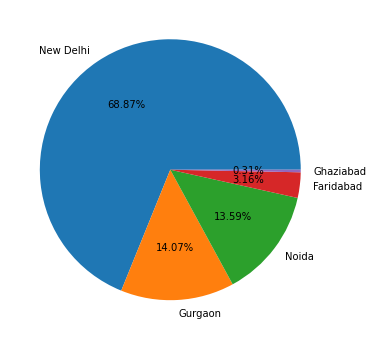

In [182]:
plt.figure(figsize = (12, 6))
plt.pie(city_values[:5], labels = city_names[:5], autopct="%1.2f%%")

## Find the top 10 cusuines

In [184]:
finalDf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [212]:
topCuisines = finalDf.groupby(['Cuisines']).size().reset_index().rename(columns = {0 : "Transaction Count"})
topCuisines.sort_values(by = "Transaction Count", ascending= False, inplace = True)
topCuisines.head(10)

,Cuisines,Transaction Count
1306,North Indian,936
1329,"North Indian, Chinese",511
497,Chinese,354
828,Fast Food,354
1514,"North Indian, Mughlai",334
331,Cafe,299
177,Bakery,218
1520,"North Indian, Mughlai, Chinese",197
186,"Bakery, Desserts",170
1749,Street Food,149
